# Modelo SIR

O modelo **SIR** divide a população total \( N \) em três compartimentos:

- S(t) : número de suscetíveis
- I(t): número de infectados
- R(t): número de recuperados/removidos

A população total é:

$$
N = S(t) ++ I(t) + R(t)
$$

O sistema de equações diferenciais é dado por:

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta \cdot \frac{S I}{N} \\\\
\frac{dI}{dt} &= \beta \cdot \frac{S I}{N} - \gamma I \\\\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$

### 📋 Parâmetros
- **$\beta$**  é a taxa de transmissão
- **$\gamma$** é a taxa de recuperação
- **N** : população total (constante)

---

### 📊 Casos acumulados
Podemos definir os casos acumulados como:

$$
C(t) = I(t) + R(t)
$$

Derivando:

$$
\frac{dC}{dt} =  \beta \cdot \frac{S I}{N}
$$

Essa equação representa o número de novos casos por unidade de tempo.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import modelos_epidemiologicos as model 

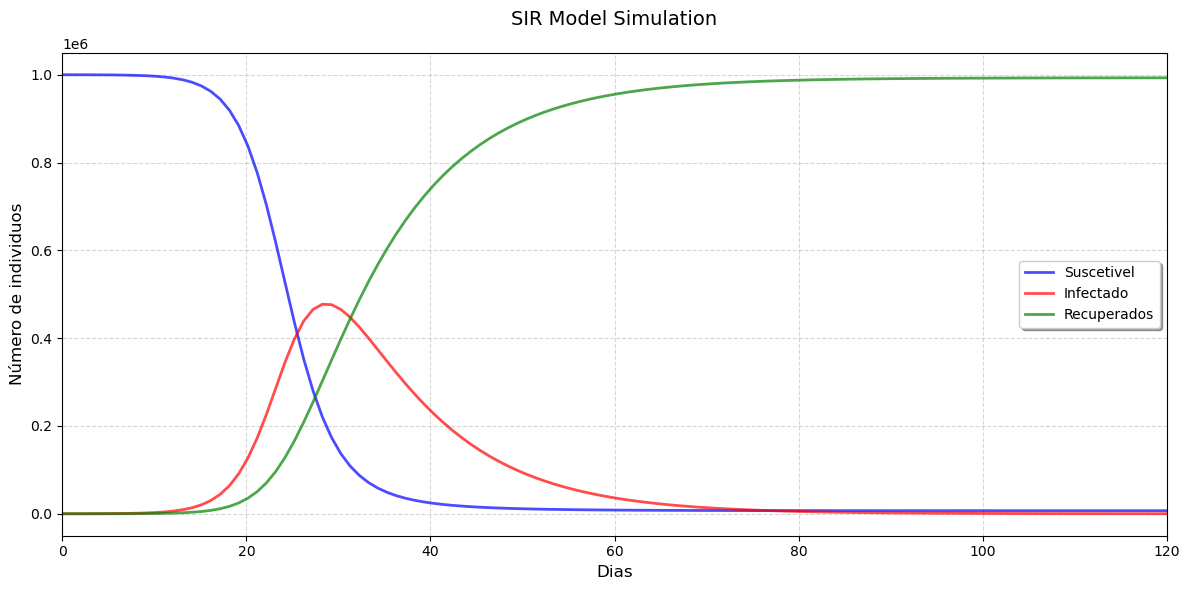

In [3]:
# Definindo parametros da população
# Definindo parametros da população

# Parâmetros (COVID-19 exemplo)
N = 1000000      # População total
beta = 0.5       # Taxa de transmissão
gamma = 1/10     # Taxa de recuperação (10 dias)

# Condições iniciais
I0 = 50   # 50 infectados
R0 = 0
S0 = N  - I0 - R0


# período
t=np.linspace(0,120,120)
#Suceptivel, infectados e Recuperados
y0 = [S0, I0, R0]


out = odeint(model.SIR, y0, t, args=(N, beta,gamma))
S,I, R = out.T 

# vizualização
plt.figure(figsize=(12, 6))

# Plot each compartment with distinct colors and labels
plt.plot(t, S, 'b-', alpha=0.7, lw=2, label='Suscetivel')
plt.plot(t, I, 'r-', alpha=0.7, lw=2, label='Infectado')
plt.plot(t, R, 'g-', alpha=0.7, lw=2, label='Recuperados')

# Add proper labels and title
plt.xlabel('Dias', fontsize=12)
plt.ylabel('Número de individuos', fontsize=12)
plt.title('SIR Model Simulation', fontsize=14, pad=20)

# Configure grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10, framealpha=1, shadow=True)
plt.xlim([0,120])
# Adjust layout and show
plt.tight_layout()
plt.show()

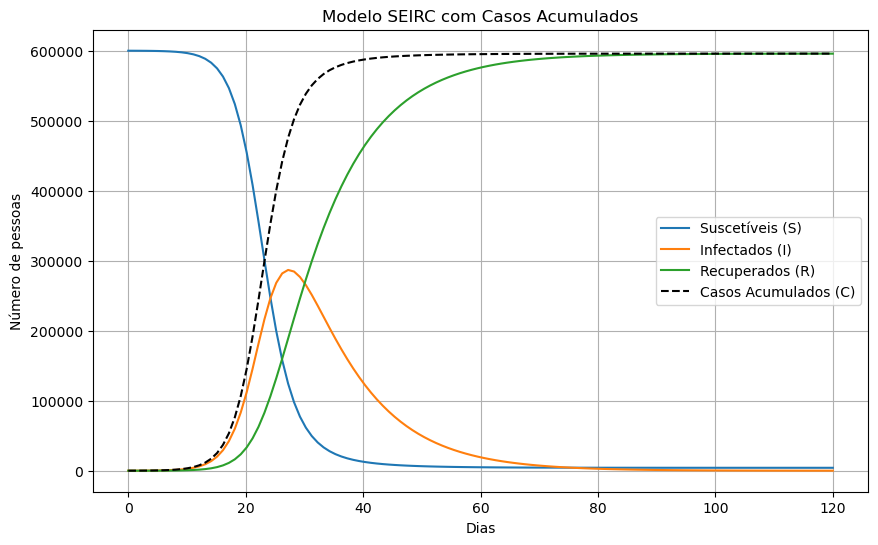

IndexError: index 4 is out of bounds for axis 1 with size 4

In [7]:
# Parâmetros (COVID-19 exemplo)
N = 600000       # População total
beta = 0.5          # Taxa de transmissão
gamma = 1/10        # Taxa de recuperação (1/10 dias⁻¹)

# Condições iniciais
I0 = 50             # 50 infectados
R0 = 0
C0 = I0             # Casos acumulados iniciais = infectados iniciais
S0 = N  - I0 - R0

y0 = [S0, I0, R0, C0]

# Tempo (dias)
t = np.linspace(0, 120, 120)

# Resolver as EDOs
out = odeint(model.SIRC, y0, t, args=(N, beta, gamma))

S,I,R,C = out.T 

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, I, label='Infectados (I)')
plt.plot(t, R, label='Recuperados (R)')
plt.plot(t, C, 'k--', label='Casos Acumulados (C)')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SEIRC com Casos Acumulados')
plt.legend()
plt.grid()
plt.show()
out[:,4]